In [1]:
import backend
from backend import preprocess_image, extract_faces, add_face, remove_face, identify_face, identify_all, facedetect

/Users/matthewtham/opt/anaconda3/envs/IDEX/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/matthewtham/opt/anaconda3/envs/IDEX/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/matthewtham/opt/anaconda3/envs/IDEX/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/matthewtham/opt


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./tiny_model/MobileFaceNet_epoch_4_iter_16000.ckpt


In [2]:
# Load in all images manually with preprocess_image
img1 = preprocess_image('Example/keane.jpg')
img2 = preprocess_image('Example/preet.jpg')
img3 = preprocess_image('Example/shaun.jpg')
img4 = preprocess_image('Example/tham.jpg')

test = preprocess_image('Example/test.jpg')


In [3]:
test_faces = extract_faces(test)

In [4]:
# Extract faces from loaded images with extract_faces
keane = [extract_faces(img1)]
preet = [extract_faces(img2)]
shaun = [extract_faces(img3)]
tham = [extract_faces(img4)]

In [24]:
# Build library with add_face

## First call should have no 'library' argument to instantiate blank library
library = backend.add_person(keane, 'keane')
print(library[0].shape)
library = backend.add_person(preet, 'preet', library)
print(library[0].shape)
library = backend.add_person(shaun, 'shaun', library)
print(library[0].shape)
library = backend.add_person(tham, 'tham', library)
print(library[0].shape)

(1, 128)
(2, 128)
(3, 128)
(4, 128)


In [25]:
print(library[1])

['keane' 'preet' 'shaun' 'tham']


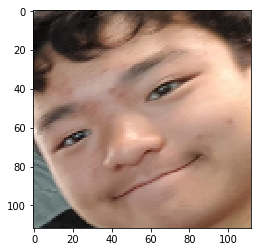

['Unknown']


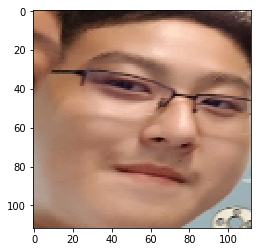

['tham']


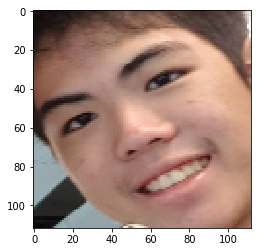

['Unknown']


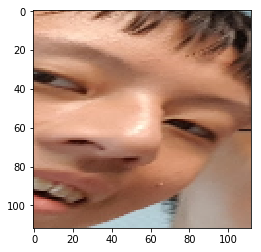

['Unknown']
[['Unknown'], array(['tham'], dtype='<U32'), ['Unknown'], ['Unknown']]


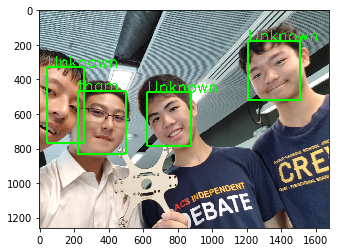

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import cv2

threshold = 0.5

test_faces = extract_faces(test)

plt.imshow(test_faces[0].astype(np.uint8))
plt.show()

identity = identify_face(test_faces[0], library, threshold=threshold)
print(identity)

plt.imshow(test_faces[1].astype(np.uint8))
plt.show()

identity = identify_face(test_faces[1], library, threshold=threshold)
print(identity)

plt.imshow(test_faces[2].astype(np.uint8))
plt.show()

identity = identify_face(test_faces[2], library, threshold=threshold)
print(identity)

plt.imshow(test_faces[3].astype(np.uint8))
plt.show()

identity = identify_face(test_faces[3], library, threshold=threshold)
print(identity)

identification = identify_all(test, library, threshold=threshold)
print(identification)

test_copy = np.copy(test)

boxes, scores = facedetect(test_copy)
boxes = boxes.astype(int)

count=0
for i in boxes:
    y1, x1, y2, x2 = i
    cv2.rectangle(test_copy, (x1, y2), (x2, y1), (0, 255, 0), 10)
    cv2.putText(test_copy, identification[count][0], (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 255, 0), 5)
    count = count+1

plt.imshow(test_copy.astype(np.uint8))
plt.show()



In [ ]:
import os
keane = []
for filename in os.listdir("keane"):
    url = os.path.join("keane", filename)
    image = preprocess_image(url)
    face = extract_faces(image)
    keane.append(face)
preet = []
for filename in os.listdir("harpreet"):
    url = os.path.join("harpreet", filename)
    image = preprocess_image(url)
    face = extract_faces(image)
    preet.append(face)

In [11]:
# Imports
import sys
import time
import os

import numpy as np
import cv2
import pickle

from sklearn.preprocessing import Normalizer, LabelEncoder
from sklearn.svm import SVC

import tensorflow as tf

In [35]:
def remove_face(label, library=None):
  if library is None:
    return
  else:
    face_library = library[0]
    label_library = library[1]
    out_encoder = LabelEncoder()
    out_encoder.classes_ = library[2]
    svm = library[3]
  
  index = np.where(label_library==label)
  new_face_library = np.delete(face_library, index, axis=0)
  new_label_library = np.delete(label_library, index, axis=0)
  out_encoder.fit(new_label_library)
  new_library = list([new_face_library, new_label_library, out_encoder.classes_, svm])
  return new_library

In [37]:
library = remove_face("keane", library)

In [ ]:
label = out_encoder.transform([label])
index = np.where(label_library==label)
new_face_library = np.delete(face_library, index, axis=0)
new_label_library = np.delete(out_encoder.classes_, index, axis=0)
out_encoder.fit(new_label_library)
new_label_library = out_encoder.transform(new_label_library)
new_library = list([new_face_library, new_label_library, out_encoder.classes_, svm])
return new_library

In [41]:
library[1]

array(['preet', 'shaun', 'tham'], dtype='<U32')

In [34]:
label="keane"
index = np.where(label_library==label)
print(index)
print(face_library.shape)
new_face_library = np.delete(face_library, index, axis=0)
print(new_face_library.shape)
print(label_library)
new_label_library = np.delete(label_library, index)
print(new_label_library)


(array([0]),)
(4, 128)
(3, 128)
['keane' 'preet' 'shaun' 'tham']
['preet' 'shaun' 'tham']


In [30]:
np.delete(label_library, 1)

array(['keane', 'shaun', 'tham'], dtype='<U32')

In [47]:
face_library = library[0]
label_library = library[1]
out_encoder = LabelEncoder()
out_encoder.classes_ = library[2]
svm = library[3]

In [27]:
print(library[1])

['keane' 'preet' 'shaun' 'tham']


In [ ]:
# Build library with add_face

## First call should have no 'library' argument to instantiate blank library
library = add_person(keane, 'keane')
print(library[0].shape)
library = add_person(preet, 'preet', library)
print(library[0].shape)

In [ ]:
keane[0].shape

In [ ]:
library[1].shape

In [ ]:
label_library = library[1]
out_encoder = LabelEncoder()
out_encoder.classes_ = library[2]
label = out_encoder.transform(["preet"])
index = np.where(label_library==label)

In [ ]:
test = library[1]
print(test)

In [ ]:
test[1]

In [ ]:
np.where(test=="keane")

In [ ]:
library = remove_face("preet", library)

In [46]:
savez_compressed('library.npz', library[0],library[1],library[2])
print(library[3])
with open("svm.pkl", 'wb') as file:
    pickle.dump(library[3], file) 


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


In [45]:
from numpy import savez_compressed, load